<a href="https://colab.research.google.com/github/Kvgohokar/IPL-Batsman-Analysis/blob/main/Rohit_Sharma_batting_stats_IPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this colab notebook, we analyse performance of Rohit Sharma (Batsman) in Indian Premier League (IPL).

Rohit Sharma is an Indian international cricketer. He played for the team Deccan Chargers during the years 2008, 2009 and has reprrsented Mumbai Indians ever since. He is a right-handed batsman and an occasional right-arm off break bowler.

We will answer 3 major questions:
1. How has Rohit Sharma performed over different seasons of IPL?
2. How had Rohit Sharma performed against different oppositions (teams) in IPL?
3. Is Rohit Sharma a slow starter? Does he take a lot of balls at the beginning of his innings and then accelerate?

### **Preprocessing**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Sports Analytics/deliveries.csv')
mdf = pd.read_csv('/content/drive/MyDrive/Sports Analytics/matches.csv')

In [3]:
df.head(1)
#This dataset contains ball by ball information of the matches.

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
mdf.head(1)
#This data set contains match information.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
df.batsman.unique()

In [6]:
df_R = df[df['batsman']== 'RG Sharma']
df_R.head(1)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
275,2,1,Mumbai Indians,Rising Pune Supergiant,5,3,RG Sharma,JC Buttler,Imran Tahir,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
m_ls = list(df_R.match_id.unique())

In [8]:
mdf_R = mdf[mdf.id.isin(m_ls)]
mdf_R.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [32]:
mdf_R['date'] = pd.to_datetime(mdf_R['date'])

In [10]:
mdf_R = mdf_R.sort_values(['date'])
mdf_R.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
63,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [11]:
mdf_R.reset_index(inplace = True, drop = True)
df_R.reset_index(inplace = True, drop = True)

### **Performance over seasons:**

In [12]:
seasons = list(mdf_R.season.unique())
seasons

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [13]:
#We calculate the total runs scored and total balls faced per match.
runs_ls = []
balls_ls = []

for m in m_ls:
    temp_df = df_R[df_R.match_id == m]
    temp_df_no_wides = temp_df[temp_df['wide_runs']== 0] #Wide balls are not counted in balls faced.
    total_balls = len(temp_df_no_wides)
    balls_ls.append(total_balls)

    runs_scored = sum(temp_df.batsman_runs)
    runs_ls.append(runs_scored)

In [14]:
mdf_R['runs'] = runs_ls
mdf_R['balls'] = balls_ls
mdf_R.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls
0,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,3,7


In [15]:
#Now we calculate runs, balls, number of matches per season.
runs_season = []
m_season = []
balls_season = []

for i in seasons:
  m_season.append(len(list(mdf_R[mdf_R.season == i].id.unique())))
  runs_season.append(mdf_R[mdf_R.season == i].runs.sum())
  balls_season.append(mdf_R[mdf_R.season == i].balls.sum())

print(runs_season)
print(m_season)
print(balls_season)

[255, 482, 362, 391, 385, 526, 443, 392, 413, 558, 297, 410]
[12, 16, 16, 13, 16, 19, 15, 16, 14, 16, 14, 15]
[204, 342, 315, 284, 315, 413, 333, 307, 293, 408, 215, 315]


In [16]:
#Finally we create a DataFrame for Rohit Sharma's stats for different season.
Ro_season = pd.DataFrame()
Ro_season['season'] = seasons
Ro_season['matches'] = m_season
Ro_season['runs'] = runs_season
Ro_season['balls'] = balls_season
Ro_season['average'] = round(Ro_season['runs']/Ro_season['matches'],2)
Ro_season['strike_rate'] = round(Ro_season['runs']/ Ro_season['balls']*100,2)

Ro_season

,season,matches,runs,balls,average,strike_rate
0,2008,12,255,204,21.25,125.00
1,2009,16,482,342,30.12,140.94
2,2010,16,362,315,22.62,114.92
3,2011,13,391,284,30.08,137.68
4,2012,16,385,315,24.06,122.22
5,2013,19,526,413,27.68,127.36
6,2014,15,443,333,29.53,133.03
7,2015,16,392,307,24.50,127.69
8,2016,14,413,293,29.50,140.96
9,2017,16,558,408,34.88,136.76


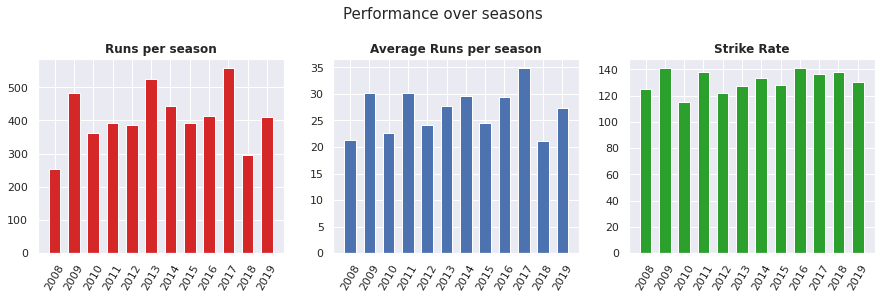

In [17]:
#Plots: Run, Average, Strike rate
fig, axs = plt.subplots(1,3, figsize=(15,4))
X = seasons

axs[0].bar(X,Ro_season.runs.tolist(), width = 0.6, color = 'tab:red')
axs[0].set_title('Runs per season', fontweight='bold')

axs[1].bar(X,Ro_season.average.tolist(), width = 0.6)
axs[1].set_title('Average Runs per season', fontweight='bold')

axs[2].bar(X,Ro_season.strike_rate.tolist(), width = 0.6, color = 'tab:green')
axs[2].set_title("Strike Rate", fontweight='bold')

for i in range(0,3):
  axs[i].set_xticks(seasons)
  axs[i].set_xticklabels(seasons, rotation = 60)

plt.suptitle('Performance over seasons', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

Rohit Sharma has consistenly scored more than 300 runs in every season except 2 (2008, 2018). He also crossed the 500 runs mark in 2 seasons (2013, 2017).

His average has varied from 20 to 35 runs per match, with his peak being in 2017 with 34.88 average.

He has scored with the strike rate of more than 120 each season except in 2010. He has a exceptional 140+ strike rate in two seasons (2009, 2016).

In conclusion, Rohit sharma has had great figures in IPL. His best performance being in the season 2017 with 558	runs, at the average of 34.88, with the strike rate 136.76. And has had some perforamces he would like to forget in the seaons 2010 and 2018 where he averaged less than 25.

### **Performance against different teams:**


In [ ]:
teams = list(df_R.bowling_team.unique())
teams

In [ ]:
runs = []
balls = []
n_match = []

for i in teams:
  temp_df = df_R[df_R.bowling_team == i]
  temp_df_no_wides = temp_df[temp_df.wide_runs == 0]
  total_balls = len(temp_df_no_wides)
  balls.append(total_balls)

  runs_scored = sum(temp_df.batsman_runs)
  runs.append(runs_scored)

  n_matches = len(temp_df.match_id.unique())
  n_match.append(n_matches)


In [20]:
teams.remove('Rising Pune Supergiants')

In [21]:
runs[0] = 86+92
balls[0] = 70+65
n_match[0] = 4 + 2

runs.remove(92)
balls.remove(65)
n_match.remove(n_match[-2])

In [22]:
Ro_teams = pd.DataFrame()
Ro_teams['Teams'] = teams
Ro_teams['Num_match'] = n_match
Ro_teams['Runs'] = runs
Ro_teams['Balls_faced'] = balls
Ro_teams['Average'] = round(Ro_teams[ 'Runs']/Ro_teams['Num_match'],2)
Ro_teams['Strike_rate'] = round(Ro_teams['Runs']/ Ro_teams['Balls_faced']*100,2)

Ro_teams

,Teams,Num_match,Runs,Balls_faced,Average,Strike_rate
0,Rising Pune Supergiant,6,178,135,29.67,131.85
1,Kolkata Knight Riders,24,827,616,34.46,134.25
2,Sunrisers Hyderabad,14,218,173,15.57,126.01
3,Royal Challengers Bangalore,25,693,502,27.72,138.05
4,Gujarat Lions,4,82,68,20.50,120.59
5,Delhi Daredevils,23,703,516,30.57,136.24
6,Kings XI Punjab,22,590,417,26.82,141.49
7,Rajasthan Royals,20,455,366,22.75,124.32
8,Chennai Super Kings,27,710,564,26.30,125.89
9,Mumbai Indians,5,103,92,20.60,111.96


In [23]:
print(teams)

['Rising Pune Supergiant', 'Kolkata Knight Riders', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Gujarat Lions', 'Delhi Daredevils', 'Kings XI Punjab', 'Rajasthan Royals', 'Chennai Super Kings', 'Mumbai Indians', 'Pune Warriors', 'Deccan Chargers', 'Delhi Capitals']


In [24]:
teams_short = ['RPS', 'KKR', 'SH', 'RCB', 'GL', 'DD', 'KXIP', 'RR', 'CSK', 'MI','PW', 'DecC','DelC']

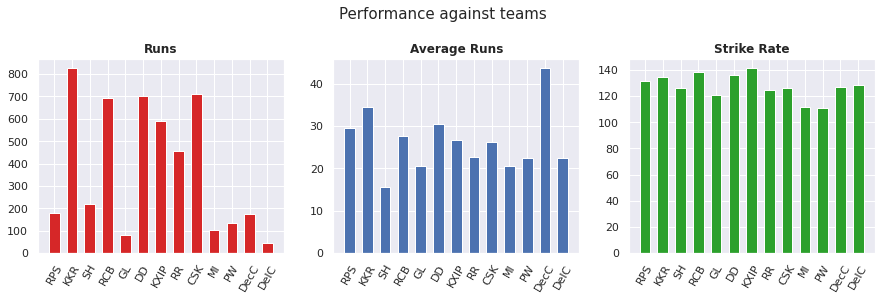

In [25]:
#Plot: Runs, Average Runs, Strike Rate against different teams.
import numpy as np
fig, axs = plt.subplots(1,3, figsize=(15,4))
X = teams_short

axs[0].bar(X,Ro_teams.Runs.tolist(), width = 0.6, color = 'tab:red')
axs[0].set_title('Runs', fontweight='bold')
start, end = axs[0].get_ylim()
axs[0].yaxis.set_ticks(np.arange(start, end, 100))

axs[1].bar(X,Ro_teams.Average.tolist(), width = 0.6)
axs[1].set_title('Average Runs', fontweight='bold')

axs[2].bar(X,Ro_teams.Strike_rate.tolist(), width = 0.6, color = 'tab:green')
axs[2].set_title("Strike Rate", fontweight='bold')

for i in range(0,3):
  axs[i].set_xticks(teams_short)
  axs[i].set_xticklabels(teams_short, rotation = 60)

plt.suptitle('Performance against teams', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

Rohit sharma has scored great amount of runs againt Kolkata Knight Riders (KKR): 827, Chennai Super Kings (CSK): 710, Delhi Daredevils (DD): 703 and Royal Challengers Banglore (RCB): 693. He also had a good average against these teams. The best average being against Deccan Charges (43.75), but he has played only a few matches against them.

He has struggled to play against Sunrisers Hyderabad with just 218 runs scored, and his least average of 15.57 with the  strike rate 126.01. He has also not perfomed well against Gujarat Lions in the 4 matches he played.

He loves to play against Kolkata Knight Riders (KKR). He has his best figures against them, 827 runs, at the average of 34.46 with the strike rate	134.25.

To conclude, we can say that given a choice, there are a few teams which Rohit Sharma prefer to play against (KKR, DD), whereas he would want to avoid playing against some oppositions (SRH, RR).

### **Is Rohit Sharma a slow starter in IPL?**

In [26]:
#Runs in the first 10, 10-30, 30+ balls per match.
runs_10b_ls = []
runs_10b_30b_ls = []
runs_30b_plus_ls = []

#Balls faced per match.
balls_10b = []
balls_10b_30b = []
balls_30b_plus = []

for m in m_ls:
    temp_df = df_R[df_R.match_id == m]
    temp_df_no_wides = temp_df[temp_df.wide_runs == 0]
    
    total_balls = len(temp_df_no_wides)
    
    if total_balls <= 10:
        runs_10b_ls.append(sum(temp_df_no_wides.batsman_runs))
        runs_10b_30b_ls.append(0)
        runs_30b_plus_ls.append(0)

        balls_10b.append(total_balls)
        balls_10b_30b.append(0)
        balls_30b_plus.append(0)
        
    elif 10 < total_balls <= 30:
        runs_10b_ls.append(sum(temp_df_no_wides.batsman_runs[:10]))
        runs_10b_30b_ls.append(sum(temp_df_no_wides.batsman_runs[10:30]))
        runs_30b_plus_ls.append(0)

        balls_10b.append(10)
        balls_10b_30b.append(total_balls - 10)
        balls_30b_plus.append(0)
        
    else:
        runs_10b_ls.append(sum(temp_df_no_wides.batsman_runs[:10]))
        runs_10b_30b_ls.append(sum(temp_df_no_wides.batsman_runs[10:30]))
        runs_30b_plus_ls.append(sum(temp_df_no_wides.batsman_runs[30:]))

        balls_10b.append(10)
        balls_10b_30b.append(30)
        balls_30b_plus.append(total_balls - 30)

In [27]:
mdf_R['balls_10b'] = balls_10b
mdf_R['runs_10b'] = runs_10b_ls
mdf_R['balls_10b_30b'] = balls_10b_30b
mdf_R['runs_10b_30b'] = runs_10b_30b_ls
mdf_R['balls_30b_plus'] = balls_30b_plus
mdf_R['runs_30b_plus'] = runs_30b_plus_ls

In [28]:
mdf_R.head(1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,runs,balls,balls_10b,runs_10b,balls_10b_30b,runs_10b_30b,balls_30b_plus,runs_30b_plus
0,64,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN,3,7,7,3,0,0,0,0


In [29]:
#Now we calculate for different seasons.
runs_10b_sea = []
runs_10b_30b_sea = []
runs_30b_plus_sea = []

balls_10b_sea = []
balls_10b_30b_sea = []
balls_30b_plus_sea = []

for i in seasons:
  balls_10b_sea.append(mdf_R[mdf_R.season == i].balls_10b.sum())
  balls_10b_30b_sea.append(mdf_R[mdf_R.season == i].balls_10b_30b.sum())
  balls_30b_plus_sea.append(mdf_R[mdf_R.season == i].balls_30b_plus.sum())

  runs_10b_sea.append(mdf_R[mdf_R.season == i].runs_10b.sum())
  runs_10b_30b_sea.append(mdf_R[mdf_R.season == i].runs_10b_30b.sum())
  runs_30b_plus_sea.append(mdf_R[mdf_R.season == i].runs_30b_plus.sum())

In [30]:
Ro_strike = pd.DataFrame()

Ro_strike['season'] = seasons
Ro_strike['strike_rate'] = Ro_season['strike_rate']

Ro_strike['runs_10b'] = runs_10b_sea
Ro_strike['balls_10b'] = balls_10b_sea
Ro_strike['strike_rate_10b'] = round(Ro_strike['runs_10b']/Ro_strike['balls_10b'] * 100,2)

Ro_strike['runs_10b_30b'] = runs_10b_30b_sea
Ro_strike['balls_10b_30b'] = balls_10b_30b_sea
Ro_strike['strike_rate_10b_30b'] = round(Ro_strike['runs_10b_30b']/Ro_strike['balls_10b_30b'] * 100,2)

Ro_strike['runs_30b_plus'] = runs_30b_plus_sea
Ro_strike['balls_30b_plus'] = balls_30b_plus_sea
Ro_strike['strike_rate_30b_plus'] = round(Ro_strike['runs_30b_plus']/Ro_strike['balls_30b_plus'] * 100,2)

Ro_strike

,season,strike_rate,runs_10b,balls_10b,strike_rate_10b,runs_10b_30b,balls_10b_30b,strike_rate_10b_30b,runs_30b_plus,balls_30b_plus,strike_rate_30b_plus
0,2008,125.00,80,91,87.91,128,112,114.29,47,31,151.61
1,2009,140.94,139,143,97.20,269,199,135.18,74,30,246.67
2,2010,114.92,124,152,81.58,224,183,122.40,14,10,140.00
3,2011,137.68,112,113,99.12,201,168,119.64,78,43,181.40
4,2012,122.22,123,138,89.13,187,176,106.25,75,41,182.93
5,2013,127.36,139,155,89.68,205,204,100.49,182,104,175.00
6,2014,133.03,127,142,89.44,245,196,125.00,71,35,202.86
7,2015,127.69,136,136,100.00,193,176,109.66,63,35,180.00
8,2016,140.96,158,119,132.77,183,161,113.66,72,43,167.44
9,2017,136.76,198,137,144.53,197,216,91.20,163,105,155.24


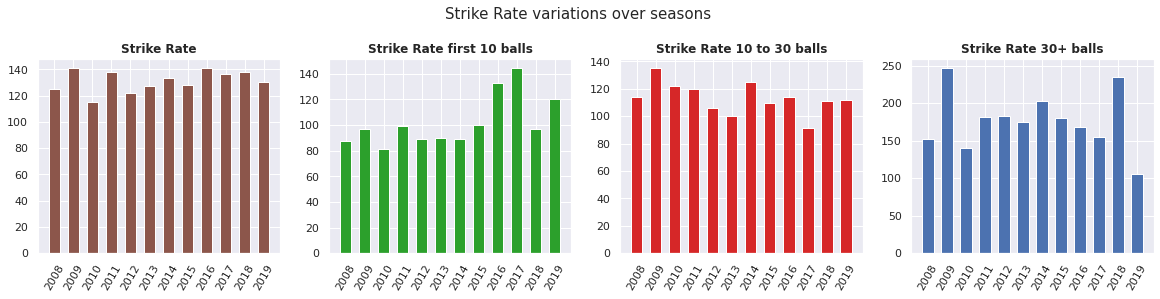

In [31]:
#Strike rate variations
fig, axs = plt.subplots(1,4, figsize=(20,4))
X = seasons

axs[0].bar(X,Ro_season.strike_rate.tolist(), width = 0.6, color = 'tab:brown')
axs[0].set_title("Strike Rate", fontweight='bold')

axs[1].bar(X,Ro_strike.strike_rate_10b.tolist(), width = 0.6, color = 'tab:green')
axs[1].set_title("Strike Rate first 10 balls", fontweight='bold')

axs[2].bar(X,Ro_strike.strike_rate_10b_30b.tolist(), width = 0.6, color = 'tab:red')
axs[2].set_title("Strike Rate 10 to 30 balls", fontweight='bold')

axs[3].bar(X,Ro_strike.strike_rate_30b_plus.tolist(), width = 0.6)
axs[3].set_title("Strike Rate 30+ balls", fontweight='bold')# pad = -20

for i in range(0,4):
  axs[i].set_xticks(seasons)
  axs[i].set_xticklabels(seasons, rotation = 60)

plt.suptitle('Strike Rate variations over seasons', size = 15, fontname="DejaVu Sans")
plt.subplots_adjust(top=0.8)
plt.show()

During the years 2010 to 2015, we can see that Rohit Sharma has had low strike rate (80 to 100) in the first 10 balls. He has started slow. But after 2015, he has adopted a different stratergy and played with a strike rate above 120. Overall, he has accelerated by in the next 20 balls, but for the years after 2015, his strike rate has not had a lot of change in the next 10 balls. Finally, he has built up a very high strike rate after 30 balls, with the highest being 250.

To conclude, we can say that Rohit Sharma was a slow starter untill the year 2015, but has remodeled the way the bats and scored faster at the start of his inning.